
# Introducción a las Máquinas de Soporte Vectorial (SVM)

## ¿Qué es una Máquina de Soporte Vectorial?

Las Máquinas de Soporte Vectorial (SVM) son un tipo de algoritmo de clasificación supervisada que se utiliza en Machine Learning.
Su objetivo principal es encontrar una **línea o hiperplano** que pueda separar las clases de datos de la mejor manera posible.

Imagina que tienes un grupo de puntos en un plano 2D. Cada punto pertenece a una de dos categorías.
El trabajo de SVM es encontrar la línea (o en el caso de datos más complejos, un hiperplano en un espacio de dimensiones superiores)
que separe estos puntos con la mayor **margen** posible entre las dos categorías.



## Ejemplo Práctico: Clasificación de Tipos de Flores

Imagina que trabajas en un jardín botánico y te han dado la tarea de clasificar flores en dos tipos: **rosas** y **margaritas**.
Tienes un conjunto de datos con información sobre el ancho y el largo de los pétalos de varias flores,
y necesitas decidir a qué categoría pertenece cada flor. Vamos a usar una SVM para resolver este problema.

### Paso 1: Cargar los datos

Para este ejemplo, usaremos un conjunto de datos simulado. Simularemos un pequeño conjunto de datos donde cada punto representa una flor.


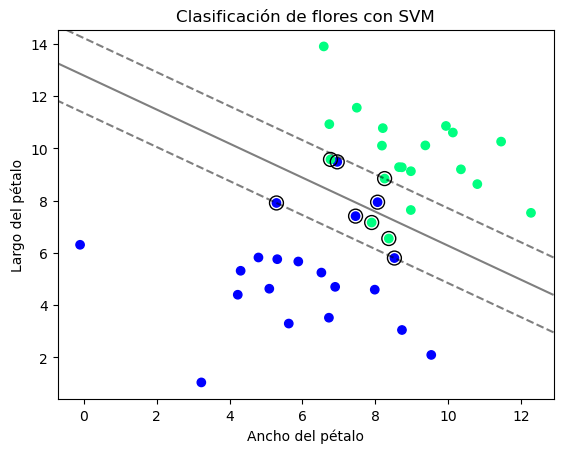

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

# Simulación de datos con valores positivos
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) * 2 + [5, 5], np.random.randn(20, 2) * 2 + [10, 10]]
Y = [0] * 20 + [1] * 20

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Entrenando el modelo SVM
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

# Visualizando los datos y la frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='winter')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creando una malla para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Dibujando la frontera de decisión y los márgenes
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Clasificación de flores con SVM")
plt.xlabel("Ancho del pétalo")
plt.ylabel("Largo del pétalo")
plt.show()


### Paso 2. Interpretación de los Resultados

En la gráfica generada, se observan varios puntos clave que nos ayudan a entender cómo la SVM está clasificando las flores:

1. **Puntos de Datos**
Los puntos representan las flores, con dos clases diferentes: azules y verdes, correspondientes a las dos especies de flores que queremos clasificar.
2. **Frontera de Decisión**
La línea sólida negra en el centro del gráfico es la frontera de decisión. Esta línea es la mejor división que el modelo SVM encontró para separar las dos clases de flores, maximizando la distancia entre los puntos de las dos clases más cercanos a esta línea.
3. **Márgenes**
Las líneas punteadas a ambos lados de la frontera de decisión representan los márgenes. El SVM busca maximizar la distancia de estos márgenes a la frontera de decisión, garantizando una separación lo más amplia posible entre las dos clases.
4. **Vectores de Soporte**
Los puntos rodeados por un círculo son los vectores de soporte. Estos puntos son cruciales porque se encuentran en los márgenes y son los que definen la posición de la frontera de decisión.

**¿Por qué hay tantos vectores de soporte?** En un conjunto de datos con cierta superposición o cuando las clases no están perfectamente separadas, es común que haya varios vectores de soporte que toquen o estén muy cerca de los márgenes. Esto se debe a que la SVM debe encontrar una separación que maximice el margen incluso en situaciones donde las clases no están completamente aisladas unas de otras.

**Vectores de soporte que rozan el margen de la otra clase:** Cuando las clases no son linealmente separables sin errores, algunos vectores de soporte pueden estar muy cerca o incluso tocar el margen de la clase opuesta. Esto indica que esos puntos están en el límite de ser clasificados incorrectamente, pero el SVM los utiliza para determinar la mejor posible frontera de decisión dadas las restricciones.

**Conclusión**
Maximización del Margen: El objetivo de la SVM es maximizar este margen para minimizar la posibilidad de error de clasificación en nuevos datos. Sin embargo, debido a la disposición natural de los datos, algunos vectores de soporte pueden estar en los márgenes o muy cerca de ellos.
Sensibilidad a Datos Solapados: En situaciones donde las clases están solapadas, la SVM aún intenta encontrar la mejor separación, lo que puede resultar en múltiples vectores de soporte cerca de los márgenes, y algunos puntos en el borde de una clasificación errónea.


### SVM No lineal (Polinómico)

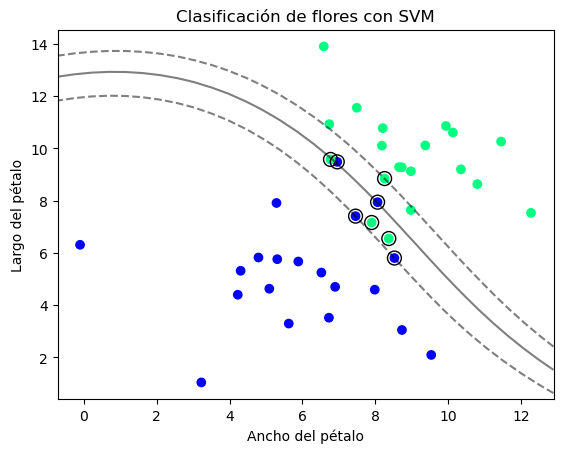

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

# Simulación de datos con valores positivos
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) * 2 + [5, 5], np.random.randn(20, 2) * 2 + [10, 10]]
Y = [0] * 20 + [1] * 20

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Entrenando el modelo SVM
model = svm.SVC(kernel='poly')
model.fit(X_train, Y_train)

# Visualizando los datos y la frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='winter')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creando una malla para evaluar el modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Dibujando la frontera de decisión y los márgenes
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("Clasificación de flores con SVM")
plt.xlabel("Ancho del pétalo")
plt.ylabel("Largo del pétalo")
plt.show()


**¿Es la frontera de decisión en SVM siempre una recta?**
No, la frontera de decisión en un SVM no siempre es una recta. Depende del tipo de kernel que se utilice:

**SVM Lineal:** Si se usa un kernel lineal, la frontera de decisión será una recta (en dos dimensiones) o un hiperplano (en más de dos dimensiones). Este tipo de SVM se utiliza cuando los datos son aproximadamente linealmente separables.

**SVM No Lineal:** Si los datos no son linealmente separables, se pueden usar otros tipos de kernels (como el kernel polinómico, el kernel RBF, etc.), que permiten que la frontera de decisión sea una curva o una superficie más compleja. Estos kernels transforman los datos a un espacio de mayor dimensión donde una separación lineal puede ser posible, y luego proyectan esa separación de vuelta al espacio original, resultando en una frontera de decisión no lineal.

**¿Es normal que algunos valores queden del lado incorrecto de la frontera de decisión?**
Sí, es posible y normal que algunos puntos queden del lado "incorrecto" de la frontera de decisión, especialmente en los siguientes casos:

Clases solapadas: En datos reales, las clases pueden estar solapadas y no ser perfectamente separables. En estos casos, un SVM lineal no puede separar perfectamente todas las muestras, por lo que algunos puntos podrían estar clasificados incorrectamente.

Margen Suave (Soft Margin): El SVM puede ser configurado para permitir errores de clasificación mediante un parámetro llamado
𝐶
C. Cuando
𝐶
C es bajo, el SVM permite que algunos puntos queden en el lado incorrecto de la frontera para maximizar el margen y evitar un sobreajuste (overfitting). Esto es útil en situaciones donde los datos no son perfectamente separables.

**Datos ruidosos (outliers):** En un conjunto de datos ruidoso o con outliers, algunos puntos podrían no seguir el patrón general de la clase a la que pertenecen, lo que puede llevar a que queden del lado incorrecto de la frontera de decisión.

Resumen
Frontera de decisión: No siempre es una recta, depende del kernel utilizado.
Puntos en el lado incorrecto: Es normal en situaciones de clases solapadas, márgenes suaves, o datos ruidosos. El SVM busca el mejor equilibrio entre maximizar el margen y minimizar los errores de clasificación.
Estos aspectos hacen que el SVM sea una herramienta flexible y robusta para la clasificación, adaptándose bien a diferentes tipos de problemas.